<a href="https://colab.research.google.com/github/holyschmidtt/projects/blob/main/Music%20Listening%20Behavior%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

jhonceasaronce_spotify_history_path = kagglehub.dataset_download('jhonceasaronce/spotify-history')

print('Data source import complete.')


# Exploring Spotify Listening History Data

Overview
This script loads and examines a Spotify listening history dataset. The goal is to clean and understand the data, ensuring it is ready for further analysis and visualization.

In [ ]:
# Load and examine the data
import pandas as pd
import numpy as np

# Read the CSV file with UTF-8-SIG encoding
df = pd.read_csv('/kaggle/input/spotify-history/spotify_history.csv', encoding='UTF-8-SIG')

# Convert timestamp to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

# Display basic information about the dataset
print('\
Dataset Info:')
print(df.info())

# Show first few rows
print('\
First few rows of the processed dataset:')
print(df.head())

Missing values in each column:
spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  149860 non-null  object        
 1   ts                 149860 non-null  datetime64[ns]
 2   platform           149860 non-null  object        
 3   ms_played          149860 non-null  int64         
 4   track_name         149860 non-null  object        
 5   artist_name        149860 non-null  object        
 6   album_name         149860 non-null  object        
 7   reason_start       149717 non-null  object     

Steps Taken in the Code
1. Importing Required Libraries
We use pandas for data manipulation and numpy for numerical operations.

2. Loading the Dataset
The dataset is read from a CSV file using UTF-8-SIG encoding to handle special characters.

3. Converting Timestamp
The ts column, which contains timestamps, is converted into a datetime format to enable proper time-based analysis.

4. Checking for Missing Values
Identifying missing values helps in understanding data quality and determining if cleaning steps are necessary.

5. Displaying Dataset Information
The .info() method provides an overview of the dataset, including column names, data types, and memory usage.

6. Previewing the Data
The first few rows of the dataset are displayed to give a quick glance at its structure and contents.

# Listening Patterns by Hour
The line chart (shown below) displays the total minutes played during each hour of the day. It provides a clear picture of your daily rhythm – where peak listening times can coincide with breaks, commutes, or evenings after work.

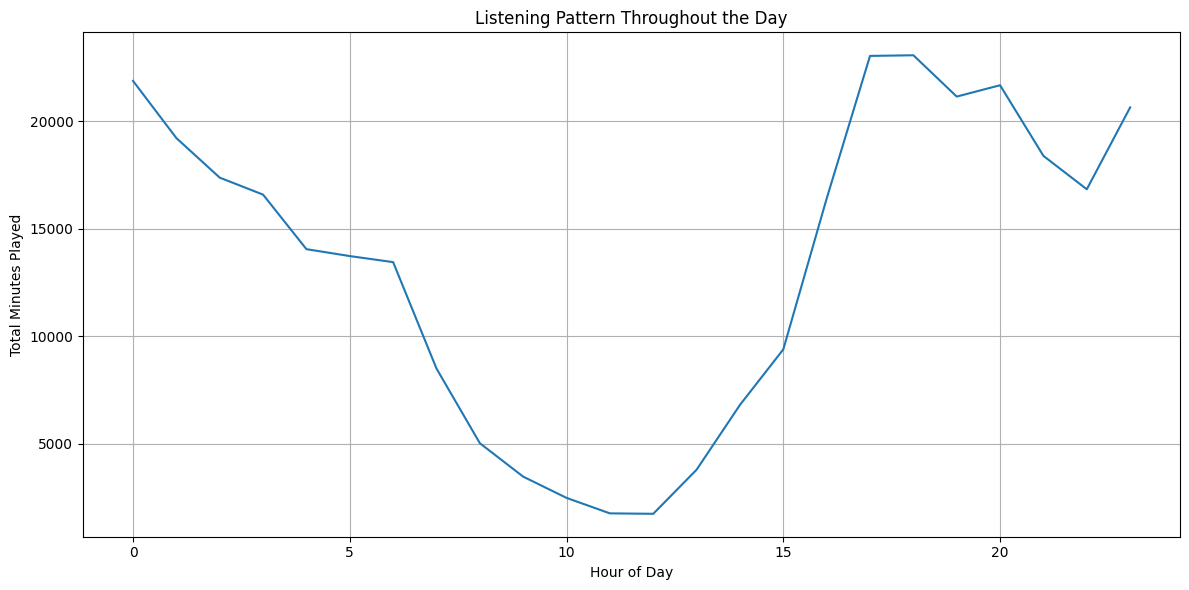

In [ ]:
# Time-based analysis
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month
df['hour'] = df['ts'].dt.hour

# Calculate listening time in minutes
df['minutes_played'] = df['ms_played'] / (1000 * 60)

# Top artists
top_artists = df.groupby('artist_name')['minutes_played'].agg(['sum', 'count']).sort_values('sum', ascending=False).head(10)
top_artists['sum'] = top_artists['sum'].round(2)

# Platform usage
platform_usage = df['platform'].value_counts()

# Listening patterns by hour
hourly_listening = df.groupby('hour')['minutes_played'].sum()

# Create visualizations
plt.figure(figsize=(12, 6))
plt.plot(hourly_listening.index, hourly_listening.values)
plt.title('Listening Pattern Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Minutes Played')
plt.grid(True)
plt.tight_layout()
plt.show()

# This graph shows how people listen to music or podcasts at different times of the day.

* Late Night (12 AM - 2 AM): Many people listen to audio late at night, possibly before bed.
* Early Morning (3 AM - 10 AM): Listening drops as people sleep or start their day.
* Afternoon (12 PM - 6 PM): More people start listening again, likely during lunch breaks or work.
* Evening (7 PM - 11 PM): Listening remains high as people unwind after work or commute home.


# Why This Matters:
* If you're a music streaming platform, this tells you when to schedule ads or promote new content.
* If you're in marketing, this shows the best times to engage listeners with promotions.
* For content creators, this helps in deciding when to release new episodes or songs.

# Key takeaway:
* People listen the most late at night and in the afternoon, so businesses should focus on these peak hours for engagement.

# Top Artists Breakdown

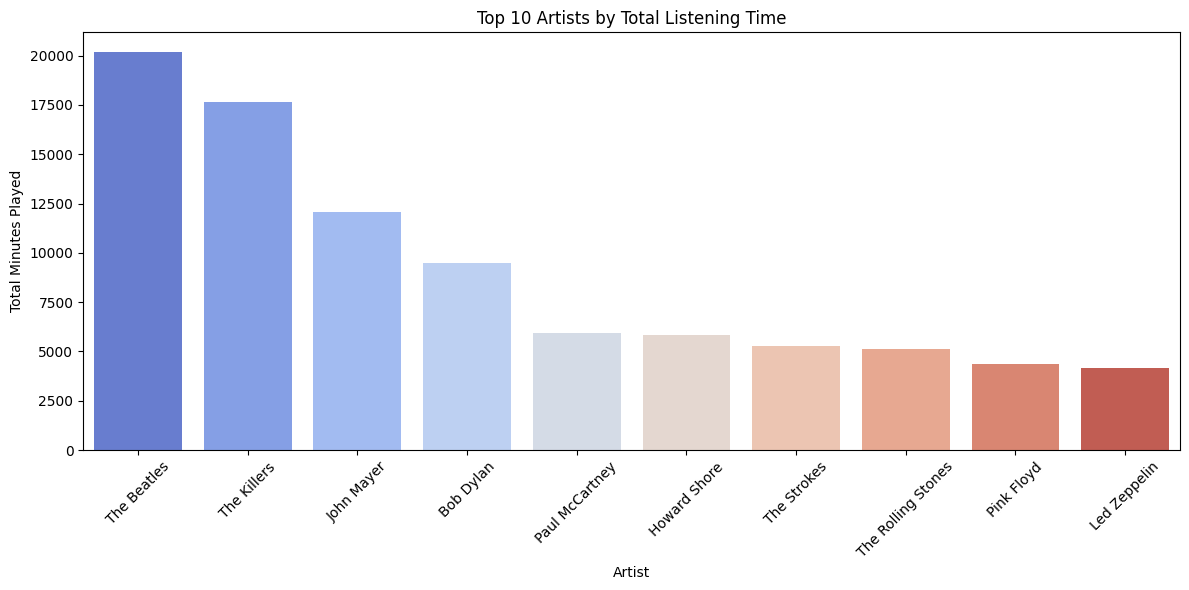

In [ ]:
import matplotlib.pyplot as plt

# 2. Top Artists Visualization
artist_analysis = df.groupby('artist_name').agg({'minutes_played': 'sum', 'spotify_track_uri': 'count'}).rename(columns={'spotify_track_uri': 'play_count'}).sort_values(by='minutes_played', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_analysis.index, y=artist_analysis['minutes_played'], palette='coolwarm')
plt.title('Top 10 Artists by Total Listening Time')
plt.xlabel('Artist')
plt.ylabel('Total Minutes Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Key Observation:

* The Beatles and The Killers are the most popular, with significantly higher listening time than the rest.
* John Mayer and Bob Dylan follow closely, meaning they also have strong engagement.
* Paul McCartney, Howard Shore, and The Strokes have moderate listening time, showing a solid fan base.
* The Rolling Stones, Pink Floyd, and Led Zeppelin are at the bottom, but still among the top 10.

# Why This Matters:
* If you're in music marketing, you now know which artists to promote more.
* If you're a streaming service, these insights help in recommending similar artists to listeners.
* If you're an artist or producer, this can guide content creation based on audience preferences.

# Key Takeaway:
The Beatles and The Killers dominate listening time, while classic rock bands still have dedicated listeners.

# Platform Distribution

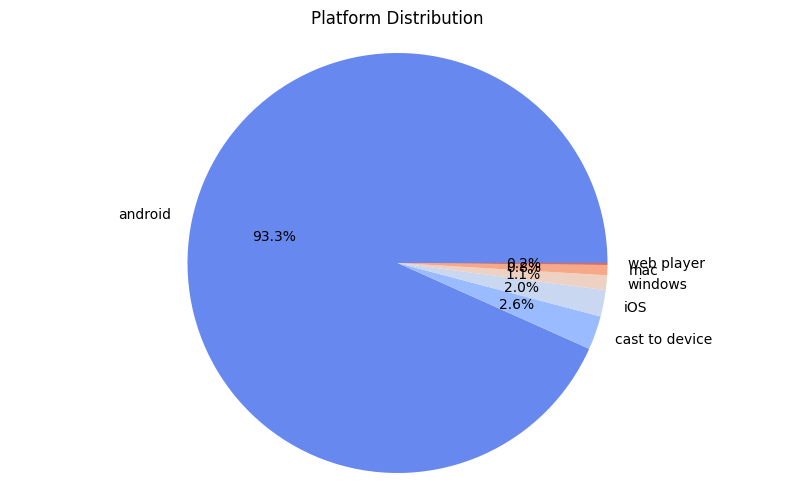

In [ ]:
# 3. Platform Usage Visualization
plt.figure(figsize=(10, 6))
platform_counts = df['platform'].value_counts()
plt.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm'))
plt.title('Platform Distribution')
plt.axis('equal')
plt.show()

# Key Observations:
1. Android dominates with 93.3% of total listening time.
* This means almost everyone prefers listening on Android devices.
* It could be because Android phones are more common or more convenient for streaming.
  
2. Other platforms make up a very small share.
* Casting to other devices (2.6%) and iOS (2.0%) have minimal usage.
* Windows, Mac, and Web Player combined are less than 2%.
* This suggests that desktop/laptop users rarely stream compared to mobile users.

# Why This Matters:
* For Marketing Teams: Focus on mobile-first advertising and promotions for Android users.
* For Developers: Prioritize Android app improvements since most users are there.
* For Content Creators: Optimize content for mobile users, like shorter clips, mobile-friendly ads, and offline downloads.

# Key Takeaway:
Most users listen on Android devices, so businesses should tailor their strategies for mobile-first experiences.

# Insight from Monthly Listening Trends

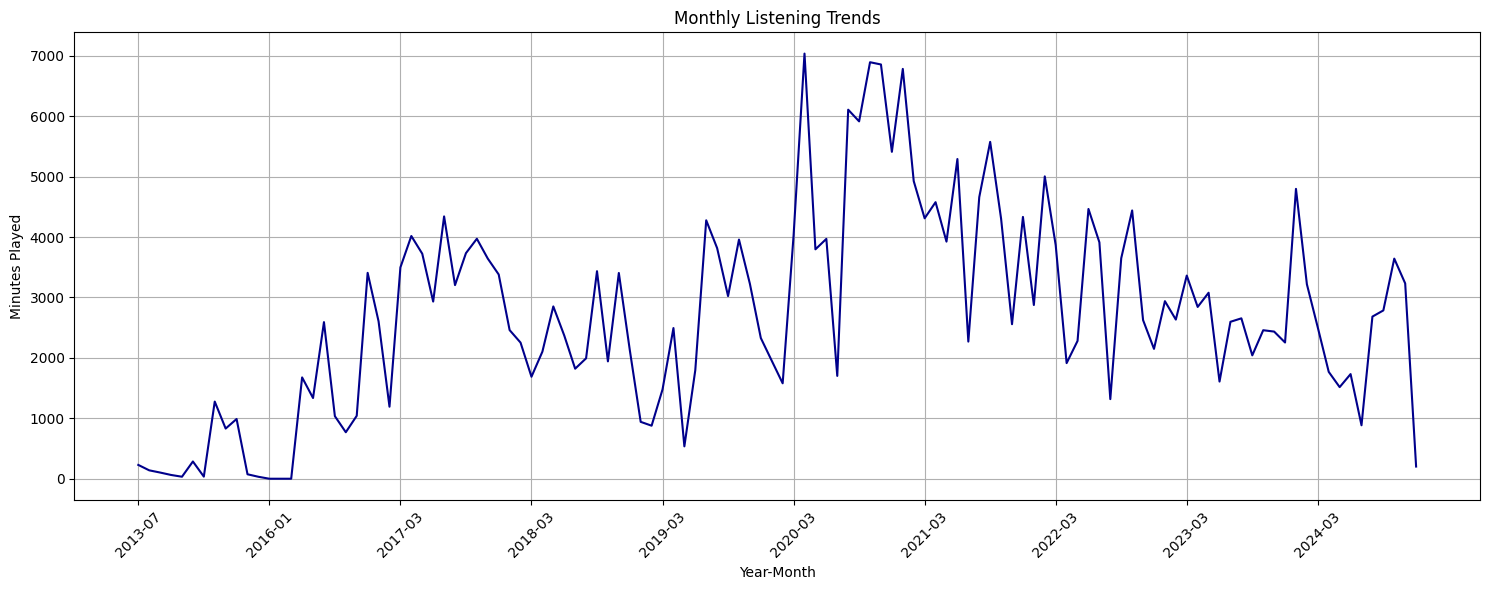

In [ ]:
# 4. Listening Trends Over Time
df['year_month'] = df['ts'].dt.to_period('M')
monthly_listening = df.groupby('year_month')['minutes_played'].sum().reset_index()
monthly_listening['year_month'] = monthly_listening['year_month'].astype(str)


plt.figure(figsize=(15, 6))
plt.plot(range(len(monthly_listening)), monthly_listening['minutes_played'], color='darkblue')
plt.xticks(range(len(monthly_listening))[::12], monthly_listening['year_month'][::12], rotation=45)
plt.title('Monthly Listening Trends')
plt.xlabel('Year-Month')
plt.ylabel('Minutes Played')
plt.grid(True)
plt.tight_layout()
plt.show()

# Key Observations:
1. Listening time has grown significantly over the years.
* In the early years, listening time was very low.
* Around 2016–2017, we see a noticeable increase, meaning users started listening more consistently.
  
2. There are peaks and drops in listening time.
* The biggest spike happened around 2020, likely due to the pandemic, when people had more time to stream music.
* After that, listening fluctuates, but the trend remains relatively strong.

3. Recent decline in listening time.
* In the most recent months, we see a drop, which could mean changes in user behavior, new platforms, or shifting interests.

  
# Why This Matters:
*  For Marketing Teams: Identify key periods of high engagement and plan promotions around them.
* For Content Creators: Understanding peak listening periods can help with content releases.
* For Business Strategy: If listening is declining, explore new ways to re-engage users (e.g., exclusive content, playlists, or partnerships).

# Key Takeaway:
Listening habits have grown over time, with major spikes around 2020. However, recent months show a decline in engagement, signaling a need for strategic action.

# Key Statistics

In [ ]:
# Print some key statistics
print("\
Key Statistics:")
print(f"Most Active Month: {monthly_listening.loc[monthly_listening['minutes_played'].idxmax(), 'year_month']}")
print(f"Most Used Platform: {platform_counts.index[0]} ({platform_counts.values[0]} plays)")
print(f"Top Artist Total Listening Time (hours): {top_10_artists.iloc[-1]/60:.2f}")

Key Statistics:
Most Active Month: 2020-04
Most Used Platform: android (139821 plays)
Top Artist Total Listening Time (hours): 336.16


In [ ]:
# This cell creates visualizations for Seasonal listening patterns, Genre distribution (if exists),
# Track popularity analysis, Skip rate patterns (if exists) and Time-of-day analysis by platform

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['ts'] = pd.to_datetime(df['ts'])

# 1. Seasonal Listening Patterns
# Define a function to map month to season

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Seasonal Listening Patterns

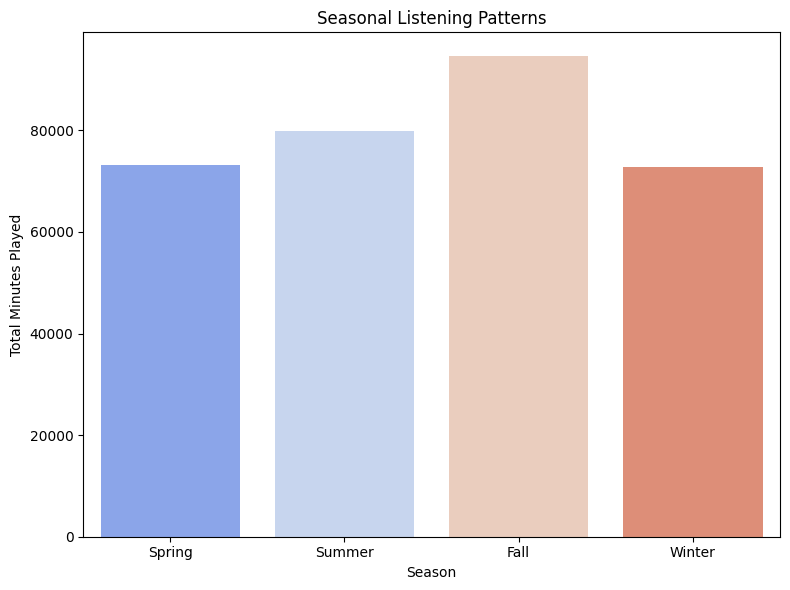

In [ ]:
# 5. Create a season column

df['season'] = df['ts'].dt.month.apply(get_season)
seasonal_listening = df.groupby('season')['minutes_played'].sum().reindex(['Spring','Summer','Fall','Winter'])

plt.figure(figsize=(8,6))
sns.barplot(x=seasonal_listening.index, y=seasonal_listening.values, palette='coolwarm')
plt.title('Seasonal Listening Patterns')
plt.xlabel('Season')
plt.ylabel('Total Minutes Played')
plt.tight_layout()
plt.show()

# Key Takeaways:
1. People listen the most in the Fall.
* Fall has the highest total listening time. This could be due to students returning to school, cooler weather encouraging indoor activities, or the release of new music before the holidays.

2. Summer and Spring also have high listening times.
* Music streaming is popular in these seasons, possibly due to vacations, road trips, and outdoor activities.

  
3. Winter has the lowest listening time.
* Despite the holidays, people may be spending more time on other activities like family gatherings, movies, or festive events.
  
# Why This Matters:
* For Marketing Teams: Plan promotions or campaigns around Fall when engagement is highest.
* For Artists & Playlists: Release new content or seasonal playlists before Fall to maximize reach.
* For Business Strategy: Since Winter has lower engagement, consider special promotions or exclusive releases to retain listeners.

# Key Takeaway:
Listening trends shift with the seasons, with Fall being the peak period. Understanding these trends helps in planning better music releases and marketing strategies.

# Top 10 Most Played Tracks

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


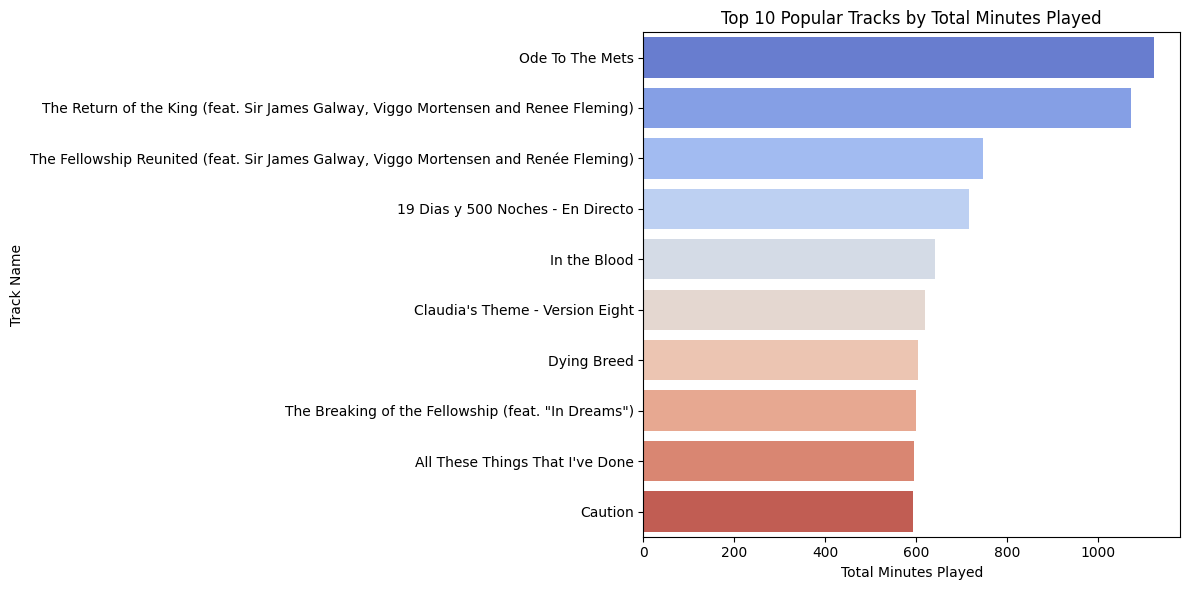

In [ ]:
# 6. Track Popularity Analysis
# Using track_name column if available, otherwise use a combination of artist_name and track_name if exists.

if 'track_name' in df.columns:
    track_popularity = df.groupby('track_name')['minutes_played'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12,6))
    sns.barplot(x=track_popularity.values, y=track_popularity.index, palette='coolwarm')
    plt.title('Top 10 Popular Tracks by Total Minutes Played')
    plt.xlabel('Total Minutes Played')
    plt.ylabel('Track Name')
    plt.tight_layout()
    plt.show()
else:
    print('No track information available in the dataset for popularity analysis.')

# Key Takeaways:
1. "Ode to the Mets" is the most played song.
* It has the highest total minutes played, meaning listeners engage with it the most.
  
2. Soundtracks from The Lord of the Rings are highly popular.
* Songs like The Return of the King and The Fellowship Reunited rank high, showing a strong preference for epic orchestral music.
  
3. A mix of different genres is present.
* While soundtracks dominate, there are also alternative rock (All These Things That I've Done), folk (In the Blood), and Latin music (19 Días y 500 Noches).

4. Fan engagement drives repeat plays.
* The high play counts indicate these tracks are emotionally resonant or tied to strong fan followings.

  
# Why This Matters:
* For Playlists & Recommendations: Highlighting these tracks in personalized playlists could increase user satisfaction.
* For Marketing Teams: Promotions or campaigns can focus on these genres and artists.
* For Business Strategy: Insights help in curating music libraries, licensing decisions, and targeted advertising.

# Insight: Shuffle vs. Non-Shuffle Listening Time

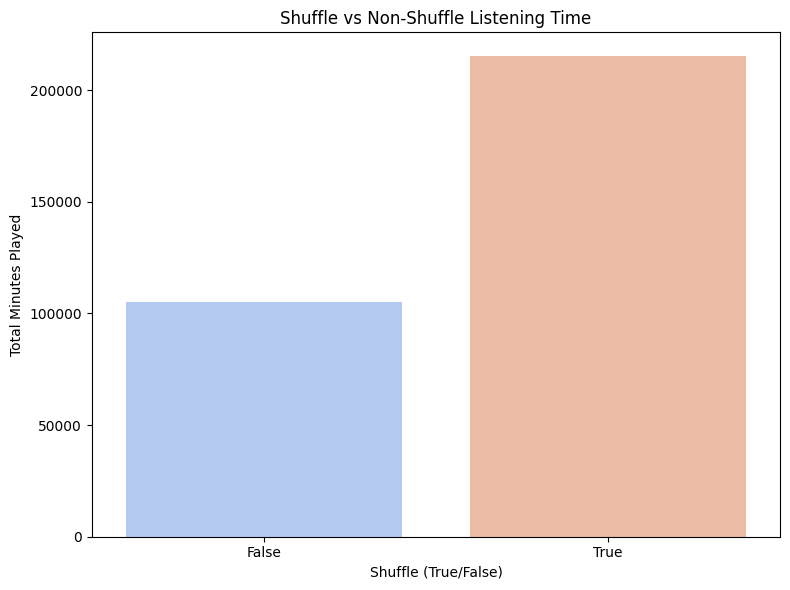

In [ ]:
# 3. Shuffle vs. Non-Shuffle Play Patterns
shuffle_analysis = df.groupby('shuffle')['minutes_played'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=shuffle_analysis.index, y=shuffle_analysis.values, palette='coolwarm')
plt.title('Shuffle vs Non-Shuffle Listening Time')
plt.xlabel('Shuffle (True/False)')
plt.ylabel('Total Minutes Played')
plt.tight_layout()
plt.show()

# Key Takeaways:
1. Shuffle Mode is More Popular
* People spend twice as much time listening to music on shuffle compared to playing songs in order.

2. Why This Matters
* Listeners prefer variety and unpredictability in their playlists.
* Shuffle mode keeps users engaged longer, meaning they don’t skip as much.
* This suggests users enjoy discovering songs rather than listening in a set order.

3. How This Can Be Used
* For Playlists & Curation: Focus on making engaging shuffle-friendly playlists.
* For Marketing: Promote personalized mixes that cater to shuffle users.
* For Business Strategy: Optimize shuffle recommendations to increase listening time.
  
# Key Takeaway:
Shuffle mode is a key feature driving engagement. Understanding this can help improve user experience and music recommendations.

# Music Listening Trends Across the Week

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


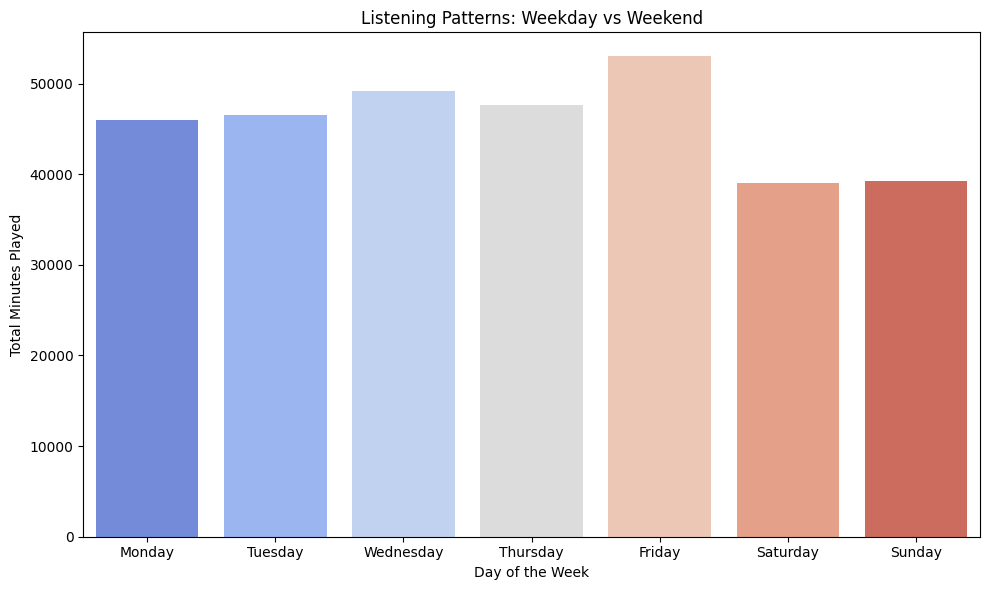

In [ ]:
if 'ts' in df.columns:
    df['weekday'] = df['ts'].dt.dayofweek
    weekday_analysis = df.groupby('weekday')['minutes_played'].sum()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], y=weekday_analysis.values, palette='coolwarm')
    plt.title('Listening Patterns: Weekday vs Weekend')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Minutes Played')
    plt.tight_layout()
    plt.show()

# Key Takeaways:
1. Listening Peaks on Fridays
* Friday has the highest listening time, suggesting people are getting into a weekend mood.
* This could be due to people unwinding after work or preparing for social events.

2. Weekdays Have Consistent Listening Patterns
* Monday to Thursday show relatively stable listening times.
* This could indicate that people listen to music during work, study, or commuting hours.

3. Weekend Drop in Listening Time
* Listening time drops on Saturday and Sunday compared to weekdays.
* This might be because people are engaged in outdoor activities or social gatherings where music is not the main focus.

# How This Can Be Used:
* For Content & Playlists: Promote Friday vibe playlists and weekend relaxation mixes.
* For Marketing & Engagement: Target ads and promotions for new music on Thursdays and Fridays.
* For Business Decisions: Optimize release schedules to align with peak listening times.

Final Thought:
Understanding these trends helps in optimizing music content, marketing strategies, and user engagement.